In [2]:
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage import measure
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter
from utils import *

[info] image size : (496, 780)


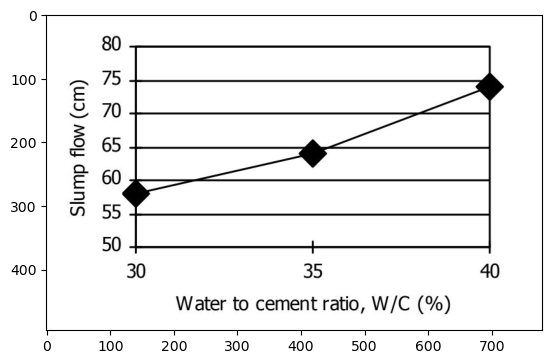

In [3]:
image_path = 'images/graph.JPG'
_, gray_image = read_image(image_path)

print(f'[info] image size : {gray_image.shape}')
plt.imshow(gray_image, cmap='gray')
plt.show()

## Projection in the vertical

[  0 255]


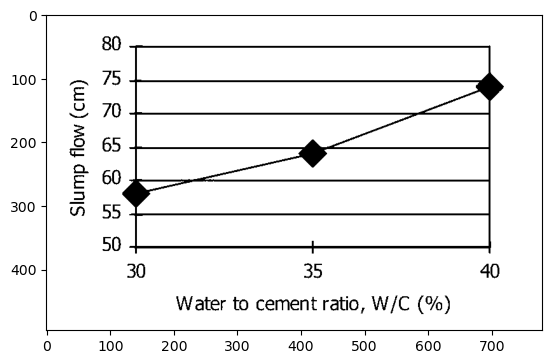

In [5]:
# binarize the image (130255) and change the points between them to 255 (background)
ret, thresh = cv2.threshold(gray_image, 127.5, 255, cv2.THRESH_BINARY)
print(np.unique(thresh))

plt.imshow(thresh, cmap='gray')
plt.show()

In [9]:
# returns height and width
(h, w) = thresh.shape

In [10]:
# initializes an array of length W, which is used to record the number of black spots in each column 
av = [0 for z in range(0, w)] 
print(len(av))

780


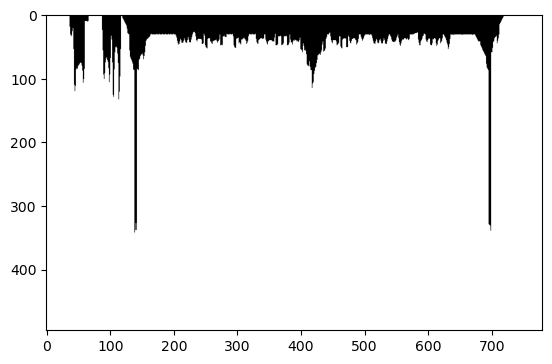

In [11]:
#Record the crest of each column
for j in range (w): # traverse a column 
    for i in range (h): # traverse a row
        if thresh[i, j] == 0: # if the point is changed to a black point
            av[j] += 1
# print(av)

v_proj = 255 * np.ones((h, w))
for j in range(w): # traverse each column
    if av[j] != 0:
        for i in range(av[j]):
            v_proj[i, j] = 0 # blackening

plt.imshow(v_proj, cmap='gray')
plt.show()

## Projection in the horizontal

In [12]:
ah = [0 for z in range(h)] 
# print(ah) 

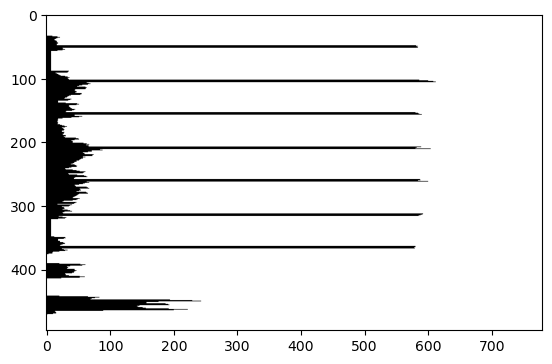

In [13]:
#Record the crest of each column
for j in range (h): # traverse a column 
    for i in range (w): # traverse a row
        if thresh[j, i] == 0: # if the point is changed to a black point
            ah[j] += 1
# print(ah)

h_proj = 255 * np.ones((h, w))
for j in range (h): # traverse each column
    if ah[j] != 0:
        for i in range(ah[j]):
            h_proj[j, i] = 0 # blackening

plt.imshow(h_proj, cmap='gray')
plt.show()

## Crop method

In [13]:
# 1. Identify region of graph
#
# 1.1 Vertical Projection
#     threshold : how to identiyfy graph axis
#     min and max width with this threshold 
#
# 1.2 Horizontal Projection
#     threshold : how to identiyfy graph axis
#     min and max high with this threshold 

In [15]:
# process h_projection to fit measure
h_proj_tmp = np.where(h_proj == 0, 255, 0)

component_labels = measure.label(h_proj_tmp)
properties = measure.regionprops(component_labels)

# areas = []
for prop in properties:
    print(prop.area)
    print(prop.bbox)
#     areas.append(prop.area)
# max_idx = areas.index(max(areas))

# intersection = ((component_labels==(max_idx+1)).astype(int) + (M1[i][0].cpu().numpy()==1).astype(int)) ==2
# prop = measure.regionprops(intersection.astype(int))
# prop

27066.0
(34, 0, 377, 613)
999.0
(391, 0, 415, 62)
3651.0
(442, 0, 472, 244)


In [18]:
# process h_projection to fit measure
v_proj_tmp = np.where(v_proj == 0, 255, 0)


component_labels = measure.label(v_proj_tmp)
properties = measure.regionprops(component_labels)

# areas = []
for prop in properties:
    print(prop.area)
    print(prop.bbox)
#     areas.append(prop.area)
# max_idx = areas.index(max(areas))

# intersection = ((component_labels==(max_idx+1)).astype(int) + (M1[i][0].cpu().numpy()==1).astype(int)) ==2
# prop = measure.regionprops(intersection.astype(int))
# prop

1831.0
(0, 37, 121, 67)
2347.0
(0, 88, 134, 118)
27538.0
(0, 120, 343, 720)


## OCR

In [ ]:
d = pytesseract.image_to_data(im, config='--psm 6 --oem 3 -c tessedit_char_whitelist=ABCDEFG0123456789', output_type=Output.DICT)
d['text']

In [24]:
# init tesseract engine 
tessing = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
pytesseract.pytesseract.tesseract_cmd = tessing

textv = pytesseract.image_to_string(im, lang='eng', config='--psm 6')
print(textv)

80
mm 15
€
2 70
3 6
= 60
s
w 55

50

30 35 40
Water to cement ratio, W/C (%)



In [25]:
numv = pytesseract.image_to_string(im[404:428, :], config='--psm 6')
print(numv)

Laieel Stel ia



In [24]:
texth = pytesseract.image_to_string(cv2.rotate(im[:, 24:44], cv2.cv2.ROTATE_90_CLOCKWISE), config='--psm 6')
print(texth )

Slump flow (cm)


